In [1]:
import sys
import os
sys.path.insert(1, '/home/artem/Desktop/programming/GPyOpt')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%pylab inline  
import GPy
import GPyOpt
from numpy.random import seed
import numpy as np
import matplotlib
import deminf_data
import matplotlib.pyplot as plt
plt.style.use('classic')
print(GPyOpt)

Populating the interactive namespace from numpy and matplotlib
<module 'GPyOpt' from '/home/artem/Desktop/programming/GPyOpt/GPyOpt/__init__.py'>


In [5]:
objective1 = deminf_data.Objective.from_name('1_Bot_4_Sim', negate=True, type_of_transform='logarithm')

In [6]:
bounds = []
ind = 1
for l, r in zip(objective1.lower_bound, objective1.upper_bound):
    bounds.append({'name':f'var_{ind}', 'type':'continuous', 'domain':(l, r)})
    ind += 1

In [7]:
bounds

[{'name': 'var_1',
  'type': 'continuous',
  'domain': (-6.907755278982137, 4.605170185988092)},
 {'name': 'var_2',
  'type': 'continuous',
  'domain': (-6.907755278982137, 4.605170185988092)},
 {'name': 'var_3',
  'type': 'continuous',
  'domain': (-34.538776394910684, 1.6094379124341003)},
 {'name': 'var_4',
  'type': 'continuous',
  'domain': (-34.538776394910684, 1.6094379124341003)}]

# Bayesian optimization

In [8]:
def f(x):
    return [objective1(x[i]) for i in range(len(x))]

In [9]:
myBopt = GPyOpt.methods.BayesianOptimization(f=f,
                                             domain=bounds,
                                             model_type='GP',
                                             acquisition_type='EI',
                                             normalize_Y=True,
                                             acquisition_weight=2,
                                             num_cores=1)

In [10]:
# Run the optimization
max_iter = 10     # evaluation budget 
eps      = 10e-6  # Minimum allows distance between the las two observations

myBopt.run_optimization(max_iter)   

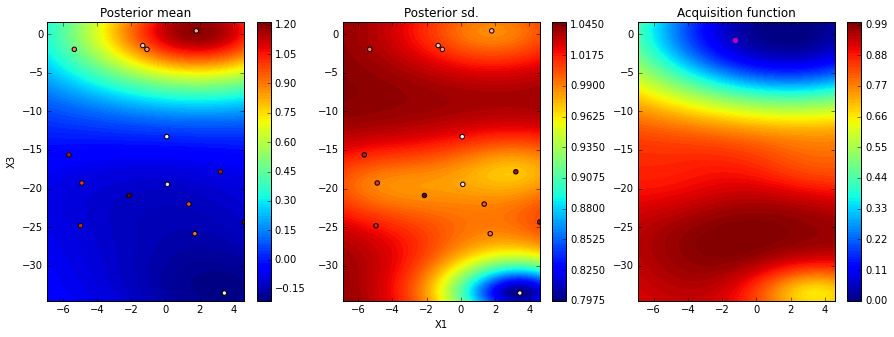

In [16]:
%matplotlib inline
myBopt.plot_acquisition(fixed_values=[None,  -1, None, -19.26009325])

In [13]:
%matplotlib widget
myBopt.plot_acquisition(fixed_values=[-2.06278553, -1, None, -1])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [19]:
plot?

In [14]:
myBopt.plot_convergence()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
myBopt.fx_opt

446.1132956504489

In [13]:
myBopt.x_opt

array([ -1.50958663,  -5.51658126,  -2.00042405, -19.26009325])